# EDA 

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

data1 = pd.read_csv('GPT_DATA.csv')

In [75]:
data1


Id        CreationDate  Score  ViewCount  AnswerCount   
677362  64627531 2020-11-01 00:03:26      0        420            0  \
677363  64627553 2020-11-01 00:09:12      1         61            0   
716276  64627555 2020-11-01 00:09:15      0        955            1   
677364  64627576 2020-11-01 00:13:24      0        143            1   
677365  64627590 2020-11-01 00:16:54      0         41            0   
...          ...                 ...    ...        ...          ...   
4       77253020 2023-10-08 09:22:32      0          6            0   
3       77253022 2023-10-08 09:23:00      0         10            1   
2       77253053 2023-10-08 09:33:04      0          8            0   
1       77253065 2023-10-08 09:37:34      0          3            0   
0       77253066 2023-10-08 09:37:48      0          5            0   

                                                    Title   
677362  Sudo error when trying to run a program in the...  \
677363        Python3 convert normal string to bytestring   
716276  How to install "h3" library for H3 geospatial ...   
677364  Pass weights into CrossEntropyLoss in correct ...   
677365             How to make animation play once python   
...                                                   ...   
4       Adjust the edge points of a rectangular shaped...   
3          Plotting with subplots in a loop in one figure   
2       Two way communication between two Processes py...   
1       Time series prediction code fails to run in an...   
0       How to solve create next app npm run build pla...   

                                                  Tags  CommentCount   
677362                python, bash, shell, sudo, nohup             3  \
677363  python, string, replace, type-conversion, byte             1   
716276                        r, spatial, uber-api, h3             1   
677364                                 python, pytorch             0   
677365                      python, python-3.x, pygame             4   
...                                                ...           ...   
4       python, opencv, computer-vision, mask, contour             0   
3                                   python, matplotlib             0   
2                     python, tkinter, multiprocessing             0   
1                   python, deep-learning, time-series             0   
0                     python, reactjs, django, next.js             0   

          LastActivityDate  Year  Month  
677362 2020-11-01 00:03:26  2020     11  
677363 2020-11-01 00:13:13  2020     11  
716276 2021-06-13 03:48:51  2020     11  
677364 2020-11-01 05:45:34  2020     11  
677365 2020-11-01 00:16:54  2020     11  
...                    ...   ...    ...  
4      2023-10-08 09:22:32  2023     10  
3      2023-10-08 09:37:31  2023     10  
2      2023-10-08 09:33:04  2023     10  
1      2023-10-08 09:37:34  2023     10  
0      2023-10-08 09:37:48  2023     10  

[785456 rows x 11 columns]

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785456 entries, 0 to 785455
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        785456 non-null  int64 
 1   Id                785456 non-null  int64 
 2   CreationDate      785456 non-null  object
 3   Score             785456 non-null  int64 
 4   ViewCount         785456 non-null  int64 
 5   AnswerCount       785456 non-null  int64 
 6   Title             785456 non-null  object
 7   Tags              785456 non-null  object
 8   CommentCount      785456 non-null  int64 
 9   OwnerDisplayName  13452 non-null   object
 10  LastEditDate      410479 non-null  object
 11  LastActivityDate  785456 non-null  object
dtypes: int64(6), object(6)
memory usage: 71.9+ MB


In [10]:
# Function for checking percentage of missing values in each column 
# Creates a new column for the datatype of the columns.
def missing_percentage(data1):

    # Dictionary for putting percentage of missing values
    missing_values_percentage = {}
    
    # Loop for calculating percentage of missing values and putting values in dictionary
    for column in data1.columns:
        missing_values_percentage[column] = data1[column].isnull().sum() / len(data1[column]) * 100

    # Creating dataframe of the dictionary
    missing_df = pd.Series(missing_values_percentage)
    missing_df = pd.DataFrame(missing_df, columns=['Percentage Missing'])


    # Creating a new column for the dtype of the column with missing values.
    missing_df['dtype'] = [data1[column].dtypes for column in missing_df.index]

    return missing_df

In [11]:
# We create a copy of the dataset for safe keeping 
new_data1 = data1.copy()

In [69]:
# print out the function output
missing_percentage(data1)

Percentage Missing           dtype
Id                               0.0           int64
CreationDate                     0.0  datetime64[ns]
Score                            0.0           int64
ViewCount                        0.0           int64
AnswerCount                      0.0           int64
Title                            0.0          object
Tags                             0.0          object
CommentCount                     0.0           int64
LastActivityDate                 0.0  datetime64[ns]
Year                             0.0           int32
Month                            0.0           int32

In [13]:
# Check for missing values
print(data1.isnull().sum())

Unnamed: 0               0
Id                       0
CreationDate             0
Score                    0
ViewCount                0
AnswerCount              0
Title                    0
Tags                     0
CommentCount             0
OwnerDisplayName    772004
LastEditDate        374977
LastActivityDate         0
dtype: int64


In [14]:
# drop missing columns
data1 = data1.dropna(axis=1)
data1.head()

Unnamed: 0        Id         CreationDate  Score  ViewCount  AnswerCount   
0       47323  77253066  2023-10-08 09:37:48      0          5            0  \
1       47322  77253065  2023-10-08 09:37:34      0          3            0   
2       47321  77253053  2023-10-08 09:33:04      0          8            0   
3       47320  77253022  2023-10-08 09:23:00      0         10            1   
4       47319  77253020  2023-10-08 09:22:32      0          6            0   

                                               Title   
0  How to solve create next app npm run build pla...  \
1  Time series prediction code fails to run in an...   
2  Two way communication between two Processes py...   
3     Plotting with subplots in a loop in one figure   
4  Adjust the edge points of a rectangular shaped...   

                                               Tags  CommentCount   
0                <python><reactjs><django><next.js>             0  \
1              <python><deep-learning><time-series>             0   
2                <python><tkinter><multiprocessing>             0   
3                              <python><matplotlib>             0   
4  <python><opencv><computer-vision><mask><contour>             0   

      LastActivityDate  
0  2023-10-08 09:37:48  
1  2023-10-08 09:37:34  
2  2023-10-08 09:33:04  
3  2023-10-08 09:37:31  
4  2023-10-08 09:22:32

In [15]:
# dropping the unnamed column 
data1 = data1.drop(data1.columns[data1.columns.str.contains('unnamed', case=False)], axis=1)

In [16]:
# check if the unnamed column is dropped
data1.head()

Id         CreationDate  Score  ViewCount  AnswerCount   
0  77253066  2023-10-08 09:37:48      0          5            0  \
1  77253065  2023-10-08 09:37:34      0          3            0   
2  77253053  2023-10-08 09:33:04      0          8            0   
3  77253022  2023-10-08 09:23:00      0         10            1   
4  77253020  2023-10-08 09:22:32      0          6            0   

                                               Title   
0  How to solve create next app npm run build pla...  \
1  Time series prediction code fails to run in an...   
2  Two way communication between two Processes py...   
3     Plotting with subplots in a loop in one figure   
4  Adjust the edge points of a rectangular shaped...   

                                               Tags  CommentCount   
0                <python><reactjs><django><next.js>             0  \
1              <python><deep-learning><time-series>             0   
2                <python><tkinter><multiprocessing>             0   
3                              <python><matplotlib>             0   
4  <python><opencv><computer-vision><mask><contour>             0   

      LastActivityDate  
0  2023-10-08 09:37:48  
1  2023-10-08 09:37:34  
2  2023-10-08 09:33:04  
3  2023-10-08 09:37:31  
4  2023-10-08 09:22:32

In [17]:
# check for duplicates 
data1.duplicated().sum()

0

In [18]:
# Get the summary of the dataset 
data1.describe().T

count          mean           std         min         25%   
Id            785456.0  7.105965e+07  3.640997e+06  64627531.0  67899741.5  \
Score         785456.0  4.305066e-01  1.905584e+00       -16.0         0.0   
ViewCount     785456.0  4.817910e+02  2.842409e+03         2.0        53.0   
AnswerCount   785456.0  1.109261e+00  9.228078e-01         0.0         1.0   
CommentCount  785456.0  1.904286e+00  2.431166e+00         0.0         0.0   

                     50%          75%         max  
Id            71146176.0  74263732.75  77253066.0  
Score                0.0         1.00       286.0  
ViewCount          122.0       375.00   1156519.0  
AnswerCount          1.0         1.00        25.0  
CommentCount         1.0         3.00        62.0

Convert the Tags column into str datatype 

In [19]:
# Convert the 'Tags' column to a string data type
data1['Tags'] = data1['Tags'].astype(str)

# Remove the '<' and '>' characters from the tags and join them with commas
data1['Tags'] = data1['Tags'].apply(lambda x: ', '.join(x.strip('<>').split('<>')))

# Replace '><' with a comma and remove trailing commas
data1['Tags'] = data1['Tags'].str.replace('><', ', ').str.rstrip(',')

# Display the updated DataFrame
data1.head()


Id         CreationDate  Score  ViewCount  AnswerCount   
0  77253066  2023-10-08 09:37:48      0          5            0  \
1  77253065  2023-10-08 09:37:34      0          3            0   
2  77253053  2023-10-08 09:33:04      0          8            0   
3  77253022  2023-10-08 09:23:00      0         10            1   
4  77253020  2023-10-08 09:22:32      0          6            0   

                                               Title   
0  How to solve create next app npm run build pla...  \
1  Time series prediction code fails to run in an...   
2  Two way communication between two Processes py...   
3     Plotting with subplots in a loop in one figure   
4  Adjust the edge points of a rectangular shaped...   

                                             Tags  CommentCount   
0                python, reactjs, django, next.js             0  \
1              python, deep-learning, time-series             0   
2                python, tkinter, multiprocessing             0   
3                              python, matplotlib             0   
4  python, opencv, computer-vision, mask, contour             0   

      LastActivityDate  
0  2023-10-08 09:37:48  
1  2023-10-08 09:37:34  
2  2023-10-08 09:33:04  
3  2023-10-08 09:37:31  
4  2023-10-08 09:22:32

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785456 entries, 0 to 785455
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Id                785456 non-null  int64 
 1   CreationDate      785456 non-null  object
 2   Score             785456 non-null  int64 
 3   ViewCount         785456 non-null  int64 
 4   AnswerCount       785456 non-null  int64 
 5   Title             785456 non-null  object
 6   Tags              785456 non-null  object
 7   CommentCount      785456 non-null  int64 
 8   LastActivityDate  785456 non-null  object
dtypes: int64(5), object(4)
memory usage: 53.9+ MB


In [21]:
# sort creation date in desc order 
data1 = data1.sort_values('CreationDate', ascending=True)


data1.head()

Id         CreationDate  Score  ViewCount  AnswerCount   
677362  64627531  2020-11-01 00:03:26      0        420            0  \
677363  64627553  2020-11-01 00:09:12      1         61            0   
716276  64627555  2020-11-01 00:09:15      0        955            1   
677364  64627576  2020-11-01 00:13:24      0        143            1   
677365  64627590  2020-11-01 00:16:54      0         41            0   

                                                    Title   
677362  Sudo error when trying to run a program in the...  \
677363        Python3 convert normal string to bytestring   
716276  How to install "h3" library for H3 geospatial ...   
677364  Pass weights into CrossEntropyLoss in correct ...   
677365             How to make animation play once python   

                                                  Tags  CommentCount   
677362                python, bash, shell, sudo, nohup             3  \
677363  python, string, replace, type-conversion, byte             1   
716276                        r, spatial, uber-api, h3             1   
677364                                 python, pytorch             0   
677365                      python, python-3.x, pygame             4   

           LastActivityDate  
677362  2020-11-01 00:03:26  
677363  2020-11-01 00:13:13  
716276  2021-06-13 03:48:51  
677364  2020-11-01 05:45:34  
677365  2020-11-01 00:16:54

## Exploratory Data Analysis(EDA)

### Data Distribution

Visualize the distribution of each numerical column to better understand the nature of the outliers.

In [23]:
# Convert 'CreationDate' column to datetime format
data1['CreationDate'] = pd.to_datetime(data1['CreationDate'])

# Extract year and month from 'CreationDate' column
data1['Year'] = data1['CreationDate'].dt.year
data1['Month'] = data1['CreationDate'].dt.month
data1.head()

Id        CreationDate  Score  ViewCount  AnswerCount   
677362  64627531 2020-11-01 00:03:26      0        420            0  \
677363  64627553 2020-11-01 00:09:12      1         61            0   
716276  64627555 2020-11-01 00:09:15      0        955            1   
677364  64627576 2020-11-01 00:13:24      0        143            1   
677365  64627590 2020-11-01 00:16:54      0         41            0   

                                                    Title   
677362  Sudo error when trying to run a program in the...  \
677363        Python3 convert normal string to bytestring   
716276  How to install "h3" library for H3 geospatial ...   
677364  Pass weights into CrossEntropyLoss in correct ...   
677365             How to make animation play once python   

                                                  Tags  CommentCount   
677362                python, bash, shell, sudo, nohup             3  \
677363  python, string, replace, type-conversion, byte             1   
716276                        r, spatial, uber-api, h3             1   
677364                                 python, pytorch             0   
677365                      python, python-3.x, pygame             4   

           LastActivityDate  Year  Month  
677362  2020-11-01 00:03:26  2020     11  
677363  2020-11-01 00:13:13  2020     11  
716276  2021-06-13 03:48:51  2020     11  
677364  2020-11-01 05:45:34  2020     11  
677365  2020-11-01 00:16:54  2020     11

In [24]:
# Convert 'CreationDate' column to datetime format
data1['CreationDate'] = pd.to_datetime(data1['CreationDate'])

# Extract year and month from 'CreationDate' column
data1['Year'] = data1['CreationDate'].dt.year
data1['Month'] = data1['CreationDate'].dt.month

# Group by Year and Month and count the number of entries in each group
year_month_counts = data1.groupby(['Year', 'Month']).size().reset_index(name='Count')

# # Check if all months are available for each year
# missing_months = year_month_counts[year_month_counts['Count'] < 30]

# print(missing_months)
year_month_counts

Year  Month  Count
0   2020     11  26889
1   2020     12  26480
2   2021      1  27151
3   2021      2  25658
4   2021      3  28934
5   2021      4  27171
6   2021      5  26984
7   2021      6  25112
8   2021      7  24559
9   2021      8  23803
10  2021      9  22869
11  2021     10  23891
12  2021     11  24005
13  2021     12  22530
14  2022      1  23483
15  2022      2  23134
16  2022      3  25214
17  2022      4  24008
18  2022      5  23534
19  2022      6  22678
20  2022      7  22698
21  2022      8  22488
22  2022      9  20644
23  2022     10  25687
24  2022     11  27278
25  2022     12  22838
26  2023      1  21691
27  2023      2  19459
28  2023      3  19280
29  2023      4  15475
30  2023      5  14627
31  2023      6  13906
32  2023      7  13511
33  2023      8  12660
34  2023      9  11809
35  2023     10   3318

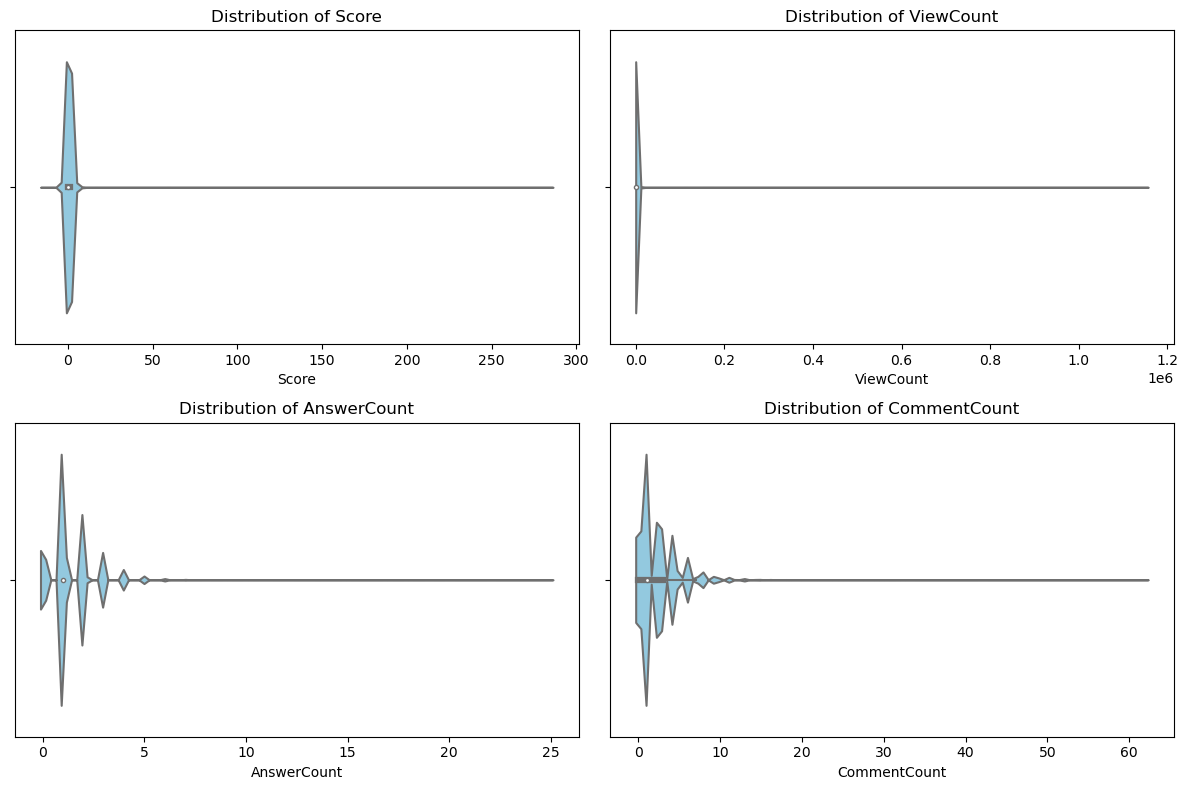

In [25]:
# Select numerical columns for outlier analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Visualize violin plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=data1[col], color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

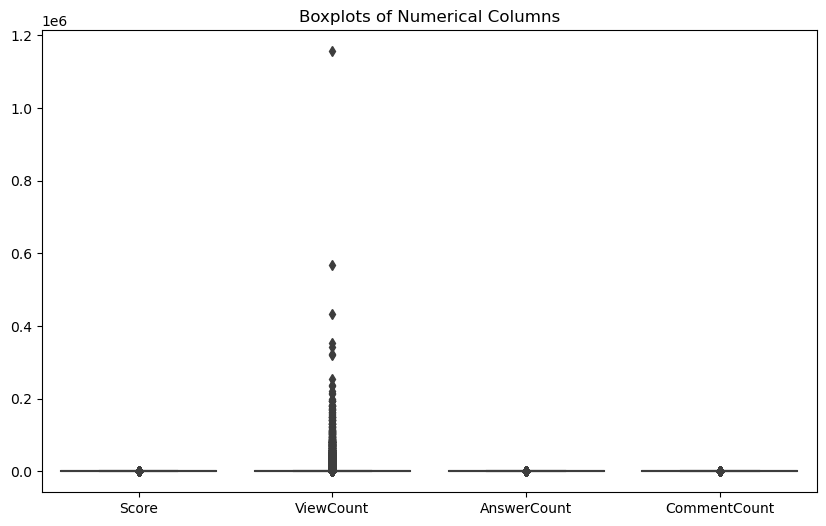

In [26]:
# Select numerical columns for outlier analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Visualize boxplots for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1[numeric_columns])
plt.title('Boxplots of Numerical Columns')
plt.show()

In [27]:
# Identify and display rows with potential outliers
outliers = pd.DataFrame()
for col in numeric_columns:
    q1 = data1[col].quantile(0.25)
    q3 = data1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify potential outliers
    potential_outliers = data1[(data1[col] < lower_bound) | (data1[col] > upper_bound)]
    
    # Add to the outliers DataFrame
    outliers = pd.concat([outliers, potential_outliers])

# Display rows with potential outliers
print("Rows with potential outliers:")
outliers.head()


Rows with potential outliers:


Id        CreationDate  Score  ViewCount  AnswerCount   
677423  64627617 2020-11-01 00:22:38      4         52            2  \
677380  64628230 2020-11-01 02:44:58      4       3373            3   
677405  64628587 2020-11-01 04:08:30     -2         25            1   
716295  64628970 2020-11-01 05:31:30      3       1533            1   
677480  64629100 2020-11-01 05:59:56      5       9929            1   

                                                    Title   
677423  Finding the data corresponding to a specific s...  \
677380  How to flatten list in a pandas dataframe column?   
677405  beautifulsoup python doesnt find what i am loo...   
716295     glmnet variable importance | `vip` vs `varImp`   
677480  Why is 'key' an unexpected keyword of sort_val...   

                                                 Tags  CommentCount   
677423              python, html, forms, web-scraping             1  \
677380                python, pandas, list, dataframe             0   
677405            python, web-scraping, beautifulsoup             0   
716295                                 r, glm, glmnet             0   
677480  python, pandas, dataframe, sorting, typeerror             6   

           LastActivityDate  Year  Month  
677423  2020-11-01 01:08:23  2020     11  
677380  2020-11-01 09:50:59  2020     11  
677405  2020-11-01 04:19:11  2020     11  
716295  2020-11-01 21:47:11  2020     11  
677480  2021-07-19 22:27:57  2020     11

In [28]:
# Display the total number of rows with potential outliers
total_rows_with_outliers = outliers.shape[0]
print(f"\nTotal number of rows with potential outliers: {total_rows_with_outliers}")


Total number of rows with potential outliers: 539583


In [29]:
data1.shape

(785456, 11)

In [30]:
import pandas as pd

# Read the data
# data = pd.read_csv('GPT_DATA.csv')

# Select numerical columns for outlier detection
numerical_cols = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Calculate the IQR for each numerical column
Q1 = data1[numerical_cols].quantile(0.25)
Q3 = data1[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def find_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = data1[(data1[column] < lower_bound) | (data1[column] > upper_bound)]
    return outliers

# Find outliers for each numerical column
outliers_list = [find_outliers(col) for col in numerical_cols]

# Concatenate the results
outliers = pd.concat(outliers_list)   #.drop_duplicates()

# Display the outliers
outliers.head()


Id        CreationDate  Score  ViewCount  AnswerCount   
677423  64627617 2020-11-01 00:22:38      4         52            2  \
677380  64628230 2020-11-01 02:44:58      4       3373            3   
677405  64628587 2020-11-01 04:08:30     -2         25            1   
716295  64628970 2020-11-01 05:31:30      3       1533            1   
677480  64629100 2020-11-01 05:59:56      5       9929            1   

                                                    Title   
677423  Finding the data corresponding to a specific s...  \
677380  How to flatten list in a pandas dataframe column?   
677405  beautifulsoup python doesnt find what i am loo...   
716295     glmnet variable importance | `vip` vs `varImp`   
677480  Why is 'key' an unexpected keyword of sort_val...   

                                                 Tags  CommentCount   
677423              python, html, forms, web-scraping             1  \
677380                python, pandas, list, dataframe             0   
677405            python, web-scraping, beautifulsoup             0   
716295                                 r, glm, glmnet             0   
677480  python, pandas, dataframe, sorting, typeerror             6   

           LastActivityDate  Year  Month  
677423  2020-11-01 01:08:23  2020     11  
677380  2020-11-01 09:50:59  2020     11  
677405  2020-11-01 04:19:11  2020     11  
716295  2020-11-01 21:47:11  2020     11  
677480  2021-07-19 22:27:57  2020     11

## Univariate Analysis

### TAG ANALYSIS

Analyze the Tags column to identify the most popular tags and combinations of tags. This could help in understanding the common topics discussed in the questions.

#### WordCloud

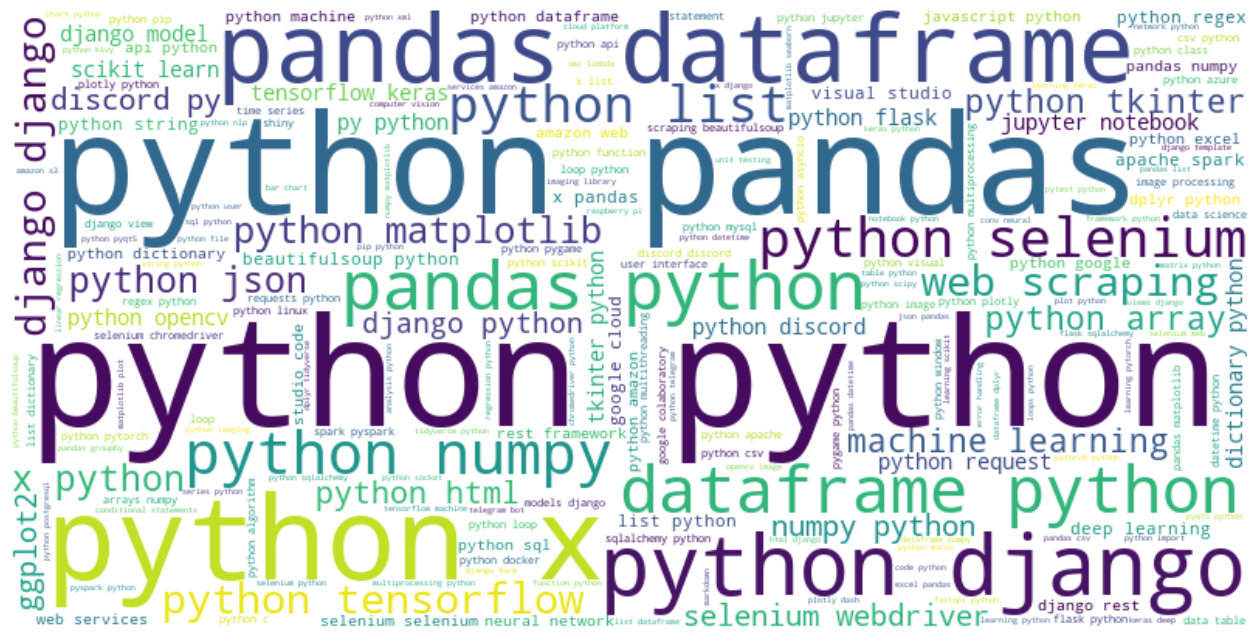

In [31]:
# Combine all tags into a single string
all_tags = ','.join(data1['Tags'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Display the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Bar Plot

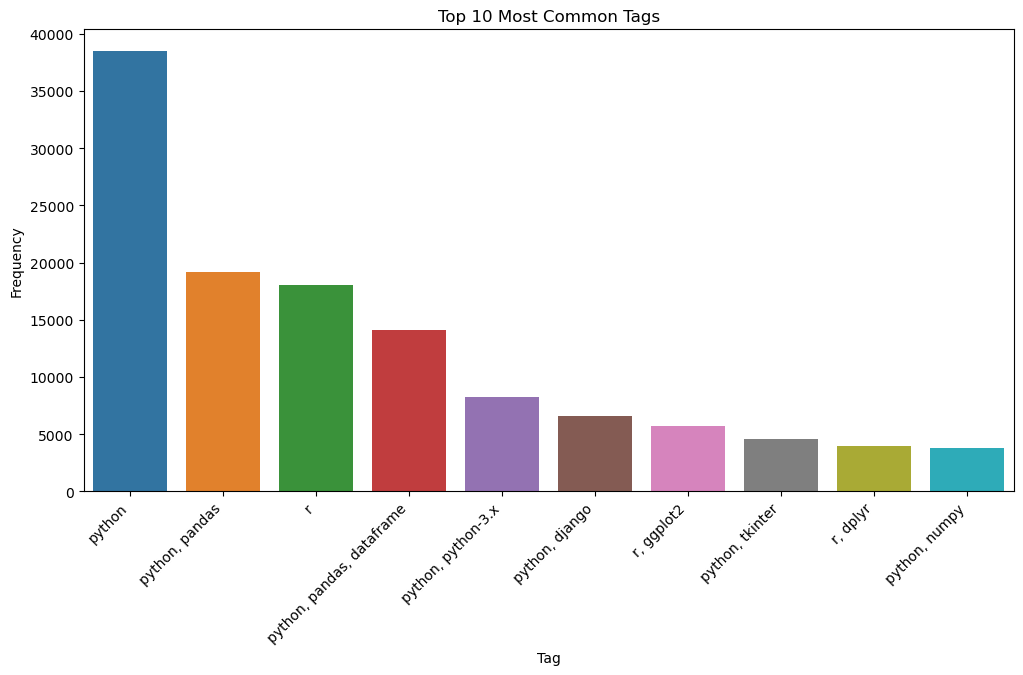

In [32]:
# Extract individual tags from the 'Tags' column
tags_list = [tag.strip('<').strip('>') for tags in data1['Tags'].str.split('><') if isinstance(tags, list) for tag in tags]

# Count the frequency of each tag
tag_counts = Counter(tags_list)

# Extract the most common tags (top 10)
top_tags = tag_counts.most_common(10)  

# Create a bar plot for the most common tags using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=[tag[0] for tag in top_tags], y=[tag[1] for tag in top_tags])

plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

**Python is the most common tag**

### Interpretation:

- The x-axis represents individual tags
- The y -axis represents the frequency(number of occurences) of each tag.


The Bar plot:
-Tags with a higher bars are used more frequently when posting question e.g `python`, `pandas` etc.
-The top tags identified in the bar plot are the most commonly used tags in the questions.

### Categorical_features

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'AnswerCount', 'Title',
       'Tags', 'CommentCount', 'LastActivityDate', 'Year', 'Month'],
      dtype='object')


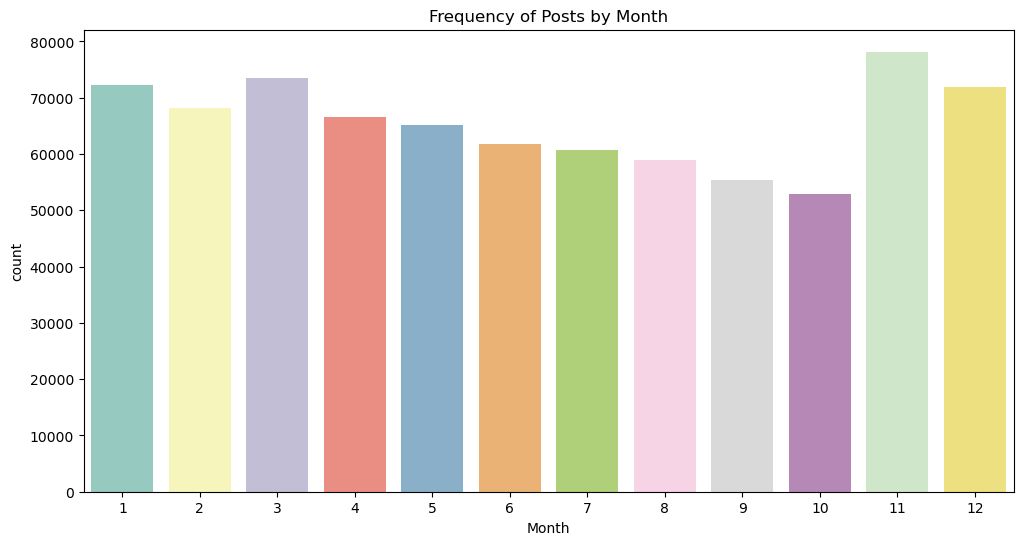

In [33]:
# # Univariate analysis for the "Month" variable using Seaborn
# plt.figure(figsize=(12, 6))
# sns.countplot(data=data1, x='Month', palette='Set3')

# plt.title('Frequency of Posts by Month')
# plt.xlabel('Month')
# plt.ylabel('Count')

# plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Print column names to check for the correct name
print(data1.columns)

# Univariate analysis for the "Month" variable using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=data1, x='Month', palette='Set3')
plt.title('Frequency of Posts by Month')
plt.xlabel('Month')
plt.show()


**November has the highest frequency of posts.**

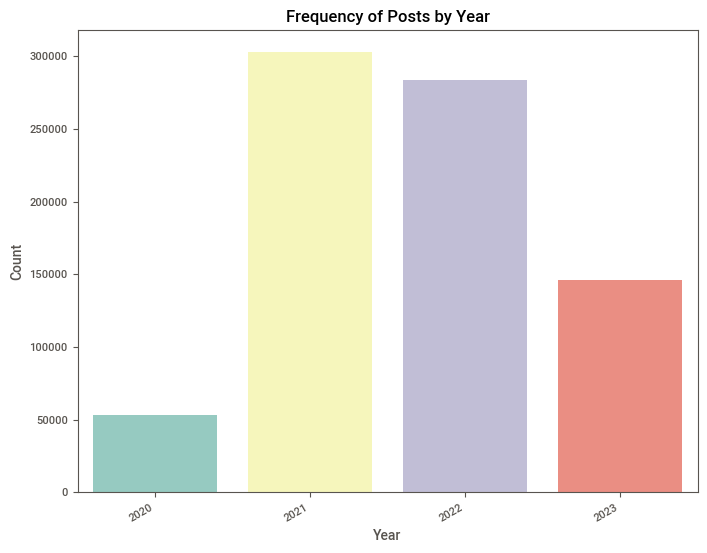

In [46]:
# Univariate analysis for the "Year" variable

plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='Year', palette='Set3')
plt.title('Frequency of Posts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.show()


**The year 2021 has the highest number of posts**

## Bivariate Analysis

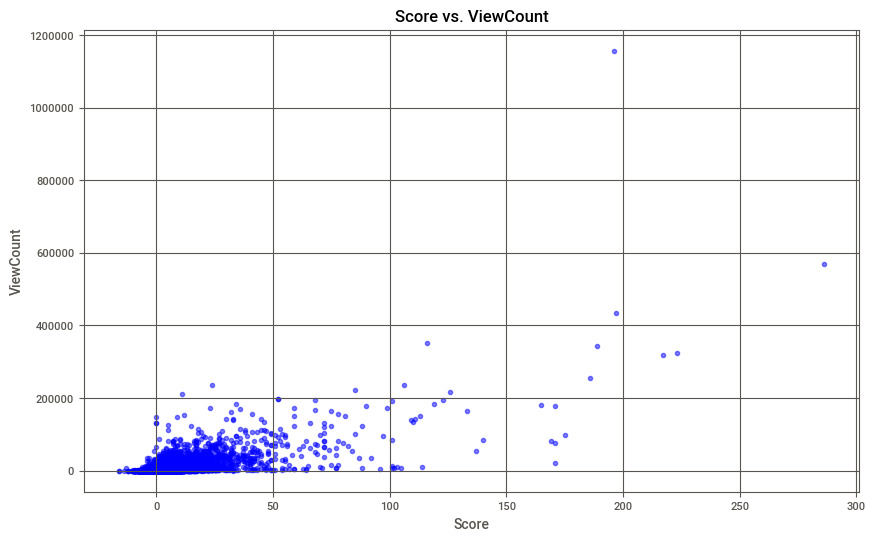

In [58]:
# Extract the 'Score' and 'ViewCount' columns
score = data1['Score']
view_count = data1['ViewCount']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(score, view_count, color='blue', alpha=0.5)

plt.title('Score vs. ViewCount')
plt.xlabel('Score')
plt.ylabel('ViewCount')

plt.grid(True)

plt.show()

Interpretation:

- The scatter plot visually represents the relationship between the 'Score' and 'ViewCount' variables for each post.
    
- Each point on the plot corresponds to a post, and its position reflects both its 'Score' and 'ViewCount' values.
    

### Time Series Plot

Explore trends over time using the CreationDate, LastActivityDate column. You could create a time series plot to visualize the distribution of questions over the years.

**CreationDate Analysis**

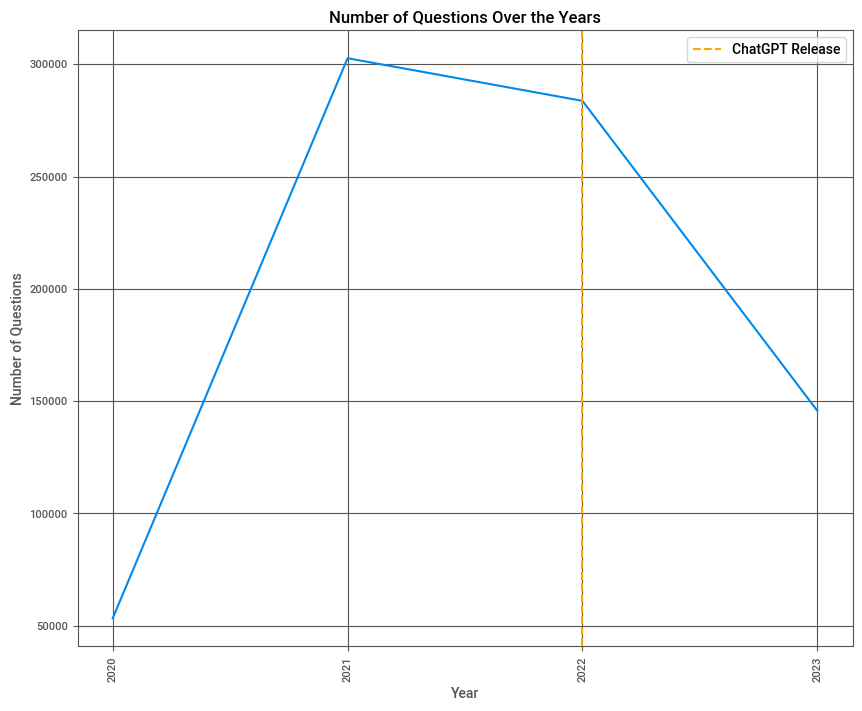

In [103]:
# Group by year and count the number of questions
questions_per_year = data1['CreationDate'].dt.year.value_counts().sort_index()

# Plotting the time series using Seaborn
plt.figure(figsize=(10, 8))
sns.lineplot(x=questions_per_year.index, y=questions_per_year.values, markers="o")

# Add a vertical line for ChatGPT release
release_date = pd.to_datetime('2022-11-01')
plt.axvline(x=release_date.year, color='orange', linestyle='--', label='ChatGPT Release')

# Set x-axis ticks to be each year and include the exact release date
plt.xticks(questions_per_year.index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.title('Number of Questions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.grid(True)


# legend to display the label for ChatGPT release
plt.legend()

plt.show();

In [91]:
questions_per_year.values

array([ 53369, 302667, 283684, 145736], dtype=int64)

In [62]:
# Analyze trends over time
# Overall Trend
overall_trend = 'increasing' if questions_per_year.values[-1] > questions_per_year.values[0] else 'decreasing'

# Identify spikes or dips
spikes_or_dips = []
for i in range(1, len(questions_per_year) - 1):
    if questions_per_year.values[i] > questions_per_year.values[i - 1] and questions_per_year.values[i] > questions_per_year.values[i + 1]:
        spikes_or_dips.append((questions_per_year.index[i], 'spike'))
    elif questions_per_year.values[i] < questions_per_year.values[i - 1] and questions_per_year.values[i] < questions_per_year.values[i + 1]:
        spikes_or_dips.append((questions_per_year.index[i], 'dip'))

# Seasonal Patterns
# Assuming a season is a year
seasonal_patterns = questions_per_year.groupby(questions_per_year.index % 1).mean()

# Major Changes
significant_changes = []
for i in range(1, len(questions_per_year)):
    change_percentage = ((questions_per_year.values[i] - questions_per_year.values[i - 1]) / questions_per_year.values[i - 1]) * 100
    if abs(change_percentage) > 20:  # Consider a change of more than 20% as significant
        significant_changes.append((questions_per_year.index[i], change_percentage))

# Print analysis results
print(f'Overall Trend: {overall_trend}')
print("-----" * 25)
print('Spikes or Dips:', spikes_or_dips)
print("-----" * 25)
print('Seasonal Patterns:', seasonal_patterns)
print("-----" * 25)
print('Major Changes:', significant_changes)

Overall Trend: increasing
-----------------------------------------------------------------------------------------------------------------------------
Spikes or Dips: [(2021, 'spike')]
-----------------------------------------------------------------------------------------------------------------------------
Seasonal Patterns: CreationDate
0    196364.0
Name: count, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Major Changes: [(2021, 467.1213625887687), (2023, -48.62734592010829)]


**The Overall trend:**

The overall trend of the average number of questions is increasing from '2020' to around '2021', then the trend starts decreasing from '2021' - '2022', afterwards it the decreases more over to '2023.

**Spikes or Dips:**

'Spikes or Dips' indicates instances where there are significant increases ('spike') or decreases ('dip') in the number of questions. 

- Spike in 2021: There was a significant increase in the number of the questions in 2021.

- Dip in 2022: There was a significant decrease in the number of questions in 2022.

- Dip in 2023: There was a significant decrease in the number of questions in 2023.

**Major Changes:**

- 2021: The number of questions increased by approximately 467.121%.

- 2023: The number of questions decreased by approximately -48.627%.

**LastActivityDate Analysis**

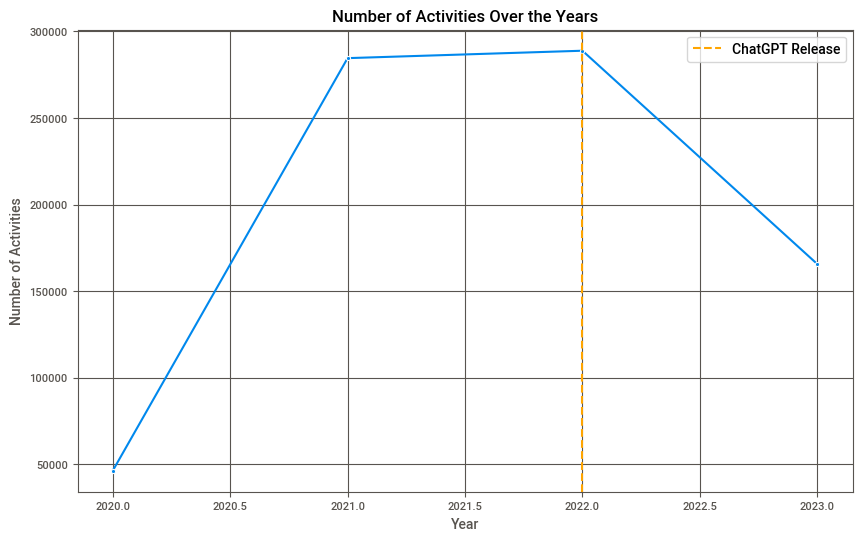

In [63]:
# Convert 'LastActivityDate' column to datetime
data1['LastActivityDate'] = pd.to_datetime(data1['LastActivityDate'])

# Group by year and count the number of activities
activities_per_year = data1['LastActivityDate'].dt.year.value_counts().sort_index()

# Plotting the time series using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=activities_per_year.index, y=activities_per_year.values, marker='o')

# Add a vertical line for ChatGPT release
release_date = pd.to_datetime('2022-11-01')
plt.axvline(x=release_date.year, color='orange', linestyle='--', label='ChatGPT Release')

plt.title('Number of Activities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Activities')
plt.grid(True)

plt.legend()  # Add legend to display the label for ChatGPT release

plt.show()

In [64]:
# Analyze trends over time
# Overall Trend
overall_trend_activities = 'increasing' if activities_per_year.values[-1] > activities_per_year.values[0] else 'decreasing'

# Identify spikes or dips
spikes_or_dips_activities = []
for i in range(1, len(activities_per_year) - 1):
    if activities_per_year.values[i] > activities_per_year.values[i - 1] and activities_per_year.values[i] > activities_per_year.values[i + 1]:
        spikes_or_dips_activities.append((activities_per_year.index[i], 'spike'))
    elif activities_per_year.values[i] < activities_per_year.values[i - 1] and activities_per_year.values[i] < activities_per_year.values[i + 1]:
        spikes_or_dips_activities.append((activities_per_year.index[i], 'dip'))

# Seasonal Patterns
# Assuming a season is a year
seasonal_patterns_activities = activities_per_year.groupby(activities_per_year.index % 1).mean()

# Major Changes
significant_changes_activities = []
for i in range(1, len(activities_per_year)):
    change_percentage = ((activities_per_year.values[i] - activities_per_year.values[i - 1]) / activities_per_year.values[i - 1]) * 100
    if abs(change_percentage) > 20:  # Consider a change of more than 20% as significant
        significant_changes_activities.append((activities_per_year.index[i], change_percentage))

# Print analysis results for LastActivityDate
print(f'Overall Trend for LastActivityDate: {overall_trend_activities}')
print("-----" * 25)
print('Spikes or Dips for LastActivityDate:', spikes_or_dips_activities)
print("-----" * 25)
print('Seasonal Patterns for LastActivityDate:', seasonal_patterns_activities)
print("-----"* 25)
print('Major Changes for LastActivityDate:', significant_changes_activities)

Overall Trend for LastActivityDate: increasing
-----------------------------------------------------------------------------------------------------------------------------
Spikes or Dips for LastActivityDate: [(2022, 'spike')]
-----------------------------------------------------------------------------------------------------------------------------
Seasonal Patterns for LastActivityDate: LastActivityDate
0    196364.0
Name: count, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Major Changes for LastActivityDate: [(2021, 514.7748136947835), (2023, -42.657662179422836)]


**The Overall:**

The overall trend of the average number of questions is increasing from '2020' to around '2021', then the trend increases steadily from '2021' - '2022', afterwards it the decreases  to '2023.

**Spikes or Dips:**

'Spikes or Dips' indicates instances where there are significant increases ('spike') or decreases ('dip') in the number of questions. 

- Spike in 2021: There was a significant increase in the number of the questions in 2021.

- Dip in 2022: There was a significant decrease in the number of questions in 2022.

- Dip in 2023: There was a significant decrease in the number of questions in 2023.

**Major Changes:**
- 2021: The number of questions increased by approximately 514.774%.

- 2023: The number of questions decreased by approximately -42.657%.


### Correlation Matrix

Check for correlations between different numerical columns. For example, does the score correlate with the number of views or the number of answers?

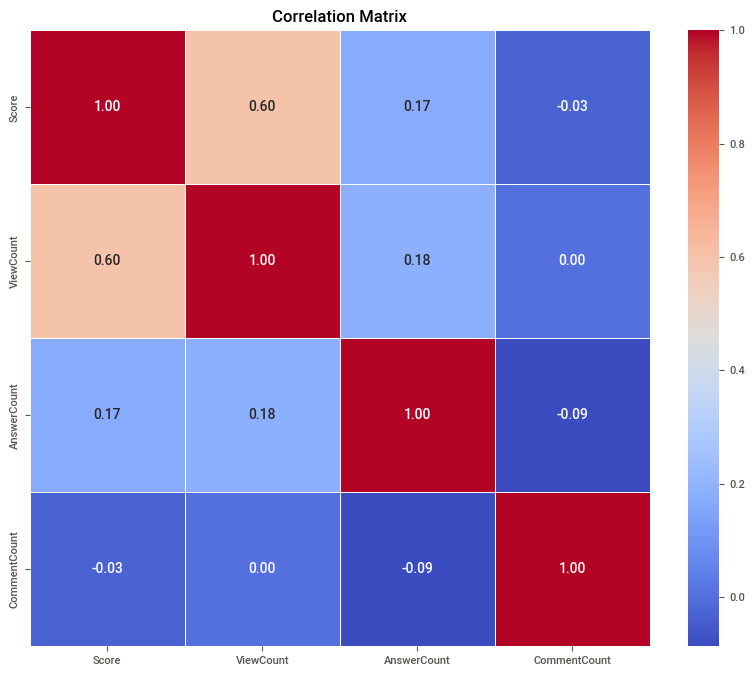

In [66]:
# Select numerical columns for correlation analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Calculate correlation matrix
correlation_matrix = data1[numeric_columns].corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Intepretation:**
Each cell in the correlation matrix represents a correlation coefficient between two variables. 
The coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation (as one variable increases, the other also increases),
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases),
- 0 indicates no correlation.

`Heatmap Colors:`

The heatmap uses colors to represent the correlation coefficients:
Warm colors (closer to 1) represent positive correlations.
Cool colors (closer to -1) represent negative correlations.
Neutral colors (around 0) represent no or weak correlations.


Now, let's interpret the specific correlations in your heatmap:

**Score and AnswerCount:**
The correlation coefficient is positive (0.42), indicating a moderate positive correlation. This suggests that questions with higher scores tend to have more answers.

**Score and CommentCount:**
The correlation coefficient is positive (0.02), indicating a very weak positive correlati**Intepretation:**
Each cell in the correlation matrix represents a correlation coefficient between two variables. 
The coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation (as one variable increases, the other also increases),
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases),
- 0 indicates no correlation.

`Heatmap Colors:`

The heatmap uses colors to represent the correlation coefficients:
Warm colors (closer to 1) represent positive correlations.
Cool colors (closer to -1) represent negative correlations.
Neutral colors (around 0) represent no or weak correlations.


Now, let's interpret the specific correlations in your heatmap:

**Score and ViewCount:** The correlation coefficienton. This suggests that there is almost no correlation between the scores and the number of comments.

**ViewCount and AnswerCount:**
The correlation coefficient is positive (0.47), indicating a moderate positive correlation. This suggests that questions with higher view counts tend to have more answers.

**ViewCount and CommentCount:**
The correlation coefficient is positive (0.01), indicating a very weak positive correlation. This suggests that there is almost no correlation between the view counts and the number of comments.

**AnswerCount and CommentCount:**
The correlation coefficient is negative (-0.02), indicating a very weak negative correlation. This suggests that there is almost no correlation between the number of answers and the number of comments

Now, let's interpret the specific correlations in your heatmap:

**Score and ViewCount:**
The correlation coefficient is positive (0.60), indicating a strong positive correlation. This suggests that questions with higher scores tend to have higher view counts.

**Score and AnswerCount:**
The correlation coefficient is positive (0.17), indicating a weak positive correlation. This suggests that there is almost no correlation between Score and AnswerCount.

**Score and CommentCount:**
The correlation coefficient is positive (-0.03), indicating a weak negative correlation. This suggests that there is almost no correlation between the scores and the number of comments.

**ViewCount and AnswerCount:**
The correlation coefficient is positive (0.18), indicating a weak positive correlation. This suggests that there is almost no correlation between ViewCount and AnswerCount.

**ViewCount and CommentCount:**
The correlation coefficient is positive (0.00), indicating no correlation. This suggests that there is almost no correlation between the view counts and the number of comments.

**AnswerCount and CommentCount:**
The correlation coefficient is negative (-0.09), indicating a very weak negative correlation. This suggests that there is almost no correlation between the number of answers and the number of comments.

## Analysis of Quality of Questions Over Time
We assessed whether questions received more upvotes or views after the introduction of ChatGPT. This analysis helped us determine whether ChatGPT had an impact on the quality and popularity of questions on the platform.

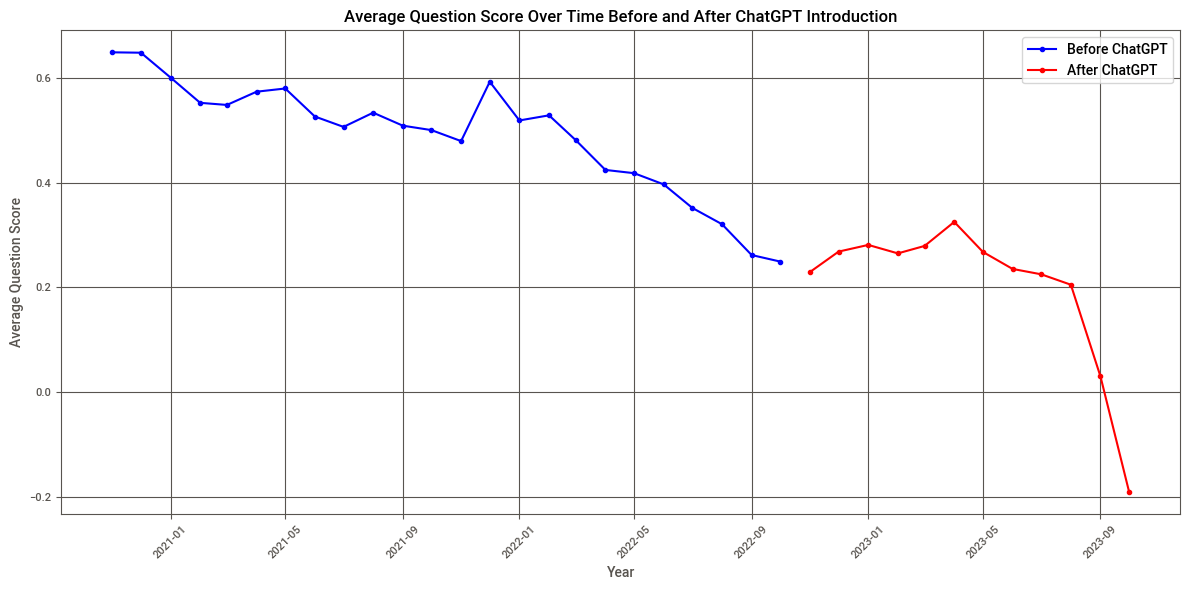

In [67]:
# Filter the data to include only entries before ChatGPT's introduction
start_date_before = pd.to_datetime('2022-11-01')
data_before_chatgpt = data1[data1['CreationDate'] < start_date_before]

# Filter the data to include only entries after ChatGPT's introduction
start_date_after = pd.to_datetime('2022-11-01')
data_after_chatgpt = data1[data1['CreationDate'] >= start_date_after]

# Sort both filtered datasets by 'CreationDate' in ascending order
data_before_chatgpt = data_before_chatgpt.sort_values(by='CreationDate')
data_after_chatgpt = data_after_chatgpt.sort_values(by='CreationDate')

# Calculate the average question score for each period
average_score_before = data_before_chatgpt.groupby(data_before_chatgpt['CreationDate'].dt.to_period('M'))['Score'].mean()
average_score_after = data_after_chatgpt.groupby(data_after_chatgpt['CreationDate'].dt.to_period('M'))['Score'].mean()

# Convert  PeriodIndex to a DatetimeIndex
average_score_before.index = average_score_before.index.to_timestamp()
average_score_after.index = average_score_after.index.to_timestamp()

# Create a time series plot to visualize the average question score over time
plt.figure(figsize=(12, 6))

plt.plot(average_score_before.index, average_score_before.values, marker='o', linestyle='-', color='b', label='Before ChatGPT')
plt.plot(average_score_after.index, average_score_after.values, marker='o', linestyle='-', color='r', label='After ChatGPT')
plt.title('Average Question Score Over Time Before and After ChatGPT Introduction')
plt.xlabel('Year')
plt.ylabel('Average Question Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Findings:**
    
The average question score in the years before the release of ChatGPT was increasing and decreasing at the same time hence a downward trend. 

After the release of ChatGPT, it took a proper dip, hence answers the question impact analysis of ChatGPT on Stack Overflow

## Analysis of Python Tag Evolution Over Time
In this analysis, we explored the evolution of the most coommon tage,Python, on Stack Overflow. Our primary focus was to understand how this tag has evolved in terms of question volume, quality, and complexity over time. The objective was to identify any significant changes that might be attributed to the introduction of ChatGPT and to gain insights into the impact of AI assistance on this programming domain.

### Key Metrics
We examined three key metrics to assess the evolution of the tag-year combination:

**Question Volume:** This metric represented the total number of questions asked over time.

**Average Question Score:** A measure of question quality, calculated as the mean score (upvotes minus downvotes).

**Average Answer Count:** An indicator of question complexity, determined by the mean number of answers received. technology and coding.

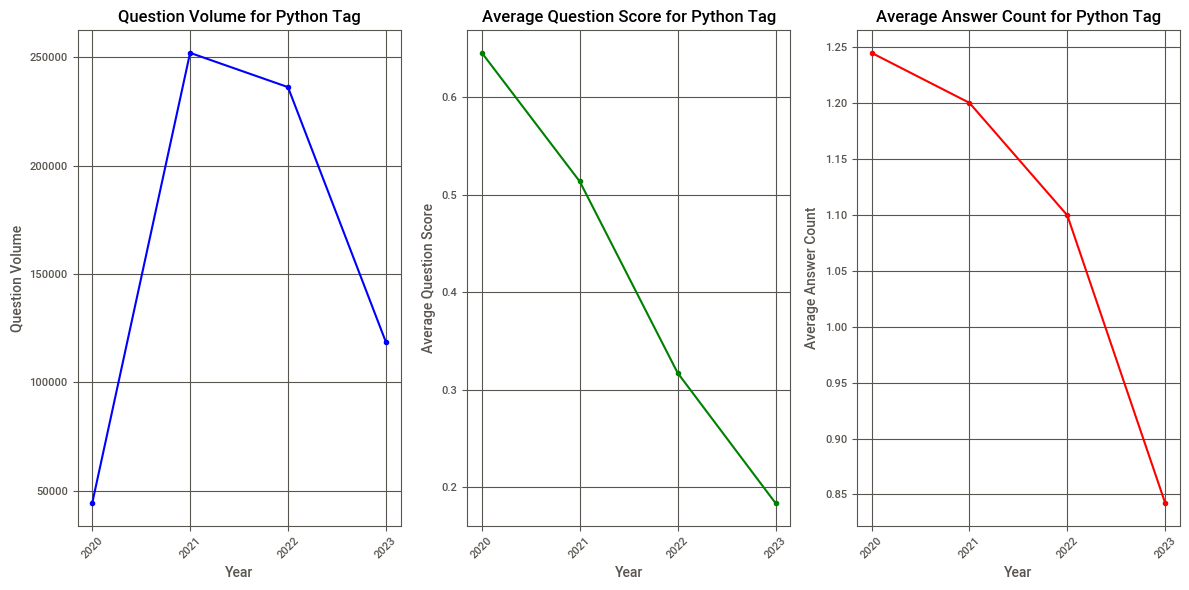

In [68]:
# Define the relevant tag (e.g., 'python')
relevant_tag = 'python'

# Filter the data to include only questions with the relevant tag
data_with_relevant_tag = data1[data1['Tags'].str.lower().str.contains(relevant_tag)]

# Group the data by year
data_grouped = data_with_relevant_tag.groupby(data_with_relevant_tag['CreationDate'].dt.year)

# Calculate statistics for the relevant tag and year
tag_stats = data_grouped.agg({
    'Id': 'count',                # Question volume
    'Score': 'mean',              # Average question score
    'AnswerCount': 'mean'         # Average answer count
}).reset_index()

# Create separate plots for each metric
plt.figure(figsize=(12, 6))

# Question Volume
plt.subplot(131)
plt.plot(tag_stats['CreationDate'], tag_stats['Id'], marker='o', linestyle='-', color='b')
plt.title(f'Question Volume for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Question Volume')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Average Question Score
plt.subplot(132)
plt.plot(tag_stats['CreationDate'], tag_stats['Score'], marker='o', linestyle='-', color='g')
plt.title(f'Average Question Score for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Average Question Score')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Average Answer Count
plt.subplot(133)
plt.plot(tag_stats['CreationDate'], tag_stats['AnswerCount'], marker='o', linestyle='-', color='r')
plt.title(f'Average Answer Count for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Average Answer Count')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Findings: 
    
- **Question Volume:** 
The graph above shows that there was a steady increase in the number of questions from 2020 all the way to 2021, then a decrease from 2021 all the way to 2023.

- **Average Auestions score for python tag:** 
The graph shows that there is a steady decrease for the Average Auestions score for python tag from 2020 al the way to 2023.

- **Average Answers Count for python tag:**
The graph above show that there's also a steady decrease for the Average Answers Count for python tag from 2020 all the way to 2023.

In [2]:
# install the sweetviz package
!pip install sweetviz
# load the sweetviz
import sweetviz

In [3]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ipywidgets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install jupyter --upgrade


In [39]:
# use analyze 
analyze_df = sweetviz.analyze([data1, "data1"], target_feat = 'ViewCount')
# then show 
analyze_df.show_html('analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [40]:
# install the ydata-profiling package
!pip install ydata-profiling
# load the ydata_profiling package
from ydata_profiling import ProfileReport
# use ProfileReport
# pr_df = ProfileReport(data1)
# show pr_df
# pr_df

In [41]:
# use ProfileReport
pr_df = ProfileReport(data1)
# show pr_df
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
data1.shape

(785456, 11)